# Problem 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('PJM.csv')

# a.

In [ ]:
# Commonwealth Edison zone - COMED
df.describe()

,Zonal COMED price,System load forecast,Zonal COMED load foecast
count,52416.000000,52416.000000,52416.000000
mean,30.467624,91010.088084,11371.249561
std,19.412552,16211.499741,2200.765254
min,-6.981259,57879.000000,7249.000000
25%,22.305977,79565.750000,9792.000000
50%,27.744014,88988.000000,11125.500000
75%,34.827130,100885.250000,12470.000000
max,839.302231,157156.000000,22241.000000


In [ ]:
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index.freq = 'H'

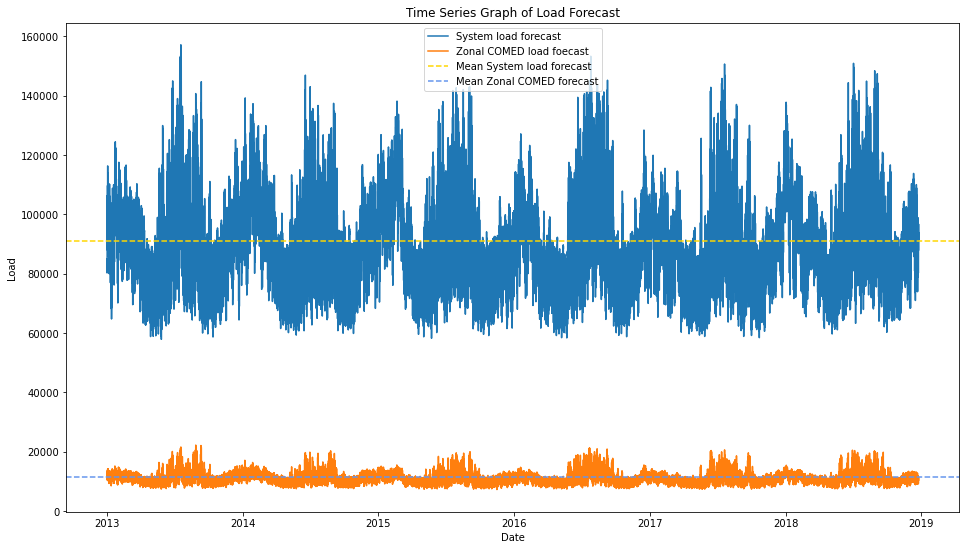

In [ ]:
mean_system_load = df[' System load forecast'].mean()
mean_COMED_load = df[' Zonal COMED load foecast'].mean()

plt.figure(figsize=(16, 9))
plt.plot(df.index, df[' System load forecast'], label='System load forecast')
plt.plot(df.index, df[' Zonal COMED load foecast'], label='Zonal COMED load foecast')
plt.axhline(mean_system_load, color='#FFD700', linestyle='--', label='Mean System load forecast')
plt.axhline(mean_COMED_load, color='#6495ED', linestyle='--', label='Mean Zonal COMED forecast')

plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Time Series Graph of Load Forecast')
plt.legend()
plt.show()

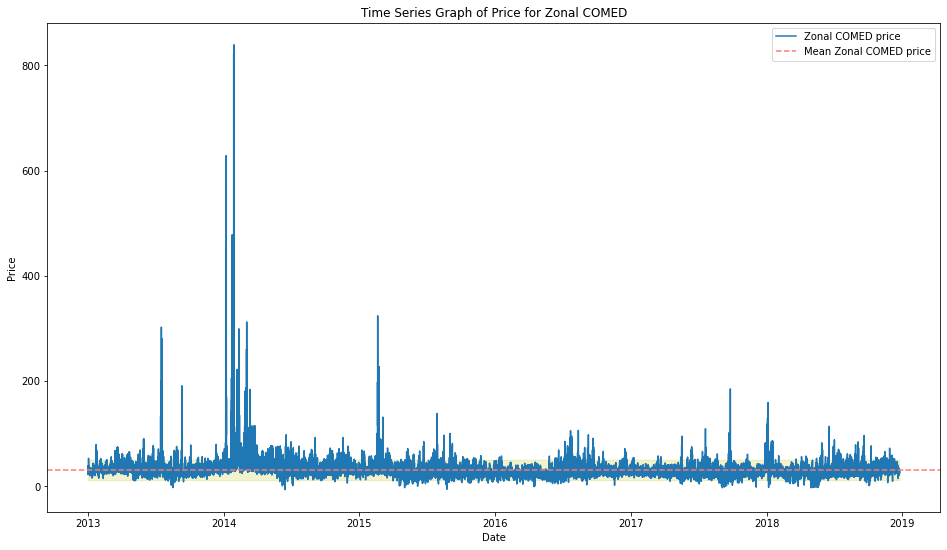

In [ ]:

mean_COMED_price = df[' Zonal COMED price'].mean()
var_COMED_price = df[' Zonal COMED price'].var()

plt.figure(figsize=(16, 9))
plt.plot(df.index, df[' Zonal COMED price'], label='Zonal COMED price')
plt.axhline(mean_COMED_price, color='#ff796c', linestyle='--', label='Mean Zonal COMED price')
plt.fill_between(df.index, mean_COMED_price - np.sqrt(var_COMED_price), mean_COMED_price + np.sqrt(var_COMED_price), color='y', alpha=0.2)


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Graph of Price for Zonal COMED')
plt.legend()
plt.show()

# b.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
def fit_ar_mod(y, lag, max_lag):
    if isinstance(lag, int):
        mod = AutoReg(y, lags=lag)
    elif lag in ['aic', 'bic', 'hqic']:
        opt_lag = ar_select_order(y, maxlag=max_lag, ic=lag, period=24).ar_lags      
        mod = AutoReg(y, lags=opt_lag)
    res = mod.fit()
    return res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:      Zonal COMED price   No. Observations:                52416
Model:                    AutoReg(47)   Log Likelihood             -167581.057
Method:               Conditional MLE   S.D. of innovations              5.936
Date:                Fri, 22 Mar 2024   AIC                              3.564
Time:                        16:18:24   BIC                              3.572
Sample:                    01-02-2013   HQIC                             3.567
                         - 12-24-2018                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  1.1602      0.068     17.102      0.000       1.027       1.293
 Zonal COMED price.L1      0.9971      0.004    228.192      0.000       0.989       1.006
 Zonal COMED price.L2     -0.0534      0.006     -8.660      0.000      -0.066      -0.041
 Zonal COMED price.L3     -0.1115      0.006    -18.065      0.000      -0.124      -0.099
 Zonal COMED price.L4      0.0446      0.006      7.193      0.000       0.032       0.057
 Zonal COMED price.L5     -0.0175      0.006     -2.819      0.005      -0.030      -0.005
 Zonal COMED price.L6      0.0137      0.006      2.217      0.027       0.002       0.026
 Zonal COMED price.L7      0.0505      0.006      8.149      0.000       0.038       0.063
 Zonal COMED price.L8     -0.0627      0.006    -10.115      0.000      -0.075      -0.051
 Zonal COMED price.L9      0.0475      0.006      7.657      0.000       0.035       0.060
 Zonal COMED price.L10     0.0340      0.006      5.484      0.000       0.022       0.046
 Zonal COMED price.L11     0.0959      0.006     15.467      0.000       0.084       0.108
 Zonal COMED price.L12    -0.0965      0.006    -15.538      0.000      -0.109      -0.084
 Zonal COMED price.L13     0.1352      0.006     21.710      0.000       0.123       0.147
 Zonal COMED price.L14    -0.1689      0.006    -27.026      0.000      -0.181      -0.157
 Zonal COMED price.L15    -0.0383      0.006     -6.079      0.000      -0.051      -0.026
 Zonal COMED price.L16     0.0436      0.006      6.926      0.000       0.031       0.056
 Zonal COMED price.L17    -0.0076      0.006     -1.204      0.229      -0.020       0.005
 Zonal COMED price.L18     0.0007      0.006      0.107      0.915      -0.012       0.013
 Zonal COMED price.L19    -0.0005      0.006     -0.080      0.936      -0.013       0.012
 Zonal COMED price.L20    -0.0125      0.006     -1.990      0.047      -0.025      -0.000
 Zonal COMED price.L21     0.0524      0.006      8.343      0.000       0.040       0.065
 Zonal COMED price.L22    -0.0637      0.006    -10.133      0.000      -0.076      -0.051
 Zonal COMED price.L23     0.1211      0.006     19.820      0.000       0.109       0.133
 Zonal COMED price.L24     0.3263      0.006     54.729      0.000       0.315       0.338
 Zonal COMED price.L25    -0.3461      0.006    -56.670      0.000      -0.358      -0.334
 Zonal COMED price.L26    -0.0504      0.006     -8.013      0.000      -0.063      -0.038
 Zonal COMED price.L27     0.0887      0.006     14.119      0.000       0.076       0.101
 Zonal COMED price.L28    -0.0192      0.006     -3.043      0.002      -0.032      -0.007
 Zonal COMED price.L29    -0.0149      0.006     -2.369      0.018      -0.027      -0.003
 Zonal COMED price.L30    -0.0213      0.006     -3.384      0.001      -0.034      -0.009
 Zonal COMED price.L31    -0.0053      0.006     -0.844      0.399      -0.018       0.007
 Zonal COMED price.L32    -0.0124      0.006     -1.963 

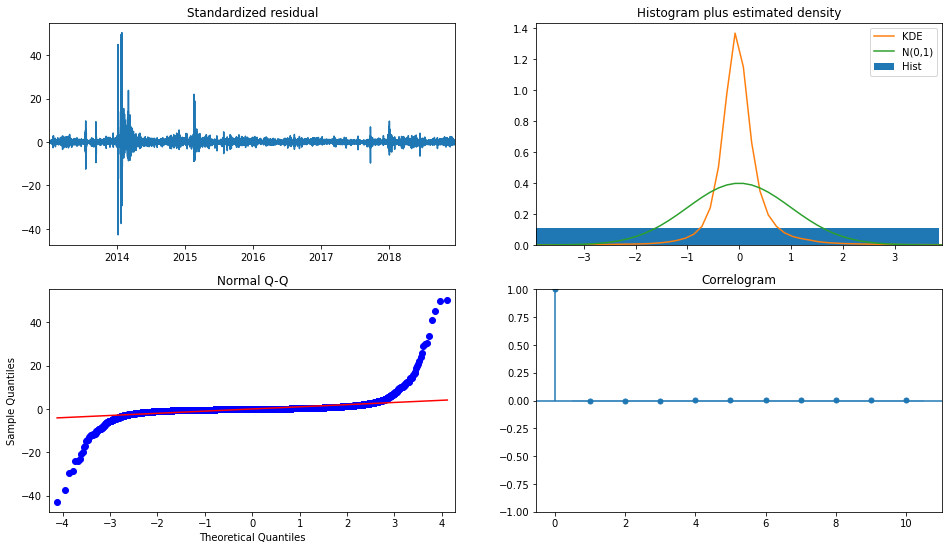

In [ ]:
# For Zonal COMED price
y = df[' Zonal COMED price']
lag = 'aic'
max_lag = 48
res_p = fit_ar_mod(y, lag, max_lag)
res_p.plot_diagnostics(figsize=[16,9])
res_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AutoReg Model Results                              
=================================================================================
Dep. Variable:      System load forecast   No. Observations:                52416
Model:                       AutoReg(48)   Log Likelihood             -421699.492
Method:                  Conditional MLE   S.D. of innovations            760.274
Date:                   Fri, 22 Mar 2024   AIC                             13.269
Time:                           16:18:29   BIC                             13.278
Sample:                       01-03-2013   HQIC                            13.272
                            - 12-24-2018                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                   378.3774     27.989     13.519      0.000     323.520     433.235
 System load forecast.L1      1.8526      0.004    424.237      0.000       1.844       1.861
 System load forecast.L2     -1.1702      0.009   -127.230      0.000      -1.188      -1.152
 System load forecast.L3      0.3463      0.011     32.906      0.000       0.326       0.367
 System load forecast.L4      0.0085      0.011      0.802      0.423      -0.012       0.029
 System load forecast.L5     -0.0803      0.011     -7.552      0.000      -0.101      -0.059
 System load forecast.L6      0.0287      0.011      2.695      0.007       0.008       0.050
 System load forecast.L7      0.0049      0.011      0.459      0.646      -0.016       0.026
 System load forecast.L8     -0.0730      0.011     -6.865      0.000      -0.094      -0.052
 System load forecast.L9      0.0630      0.011      5.923      0.000       0.042       0.084
 System load forecast.L10     0.0731      0.011      6.876      0.000       0.052       0.094
 System load forecast.L11    -0.0762      0.011     -7.162      0.000      -0.097      -0.055
 System load forecast.L12    -0.0315      0.011     -2.958      0.003      -0.052      -0.011
 System load forecast.L13     0.0749      0.011      7.038      0.000       0.054       0.096
 System load forecast.L14    -0.0354      0.011     -3.327      0.001      -0.056      -0.015
 System load forecast.L15    -0.0460      0.011     -4.321      0.000      -0.067      -0.025
 System load forecast.L16     0.0117      0.011      1.103      0.270      -0.009       0.033
 System load forecast.L17     0.0434      0.011      4.074      0.000       0.023       0.064
 System load forecast.L18     0.0137      0.011      1.288      0.198      -0.007       0.035
 System load forecast.L19    -0.0113      0.011     -1.058      0.290      -0.032       0.010
 System load forecast.L20    -0.0199      0.011     -1.869      0.062      -0.041       0.001
 System load forecast.L21     0.0056      0.011      0.526      0.599      -0.015       0.026
 System load forecast.L22    -0.0402      0.011     -3.789      0.000      -0.061      -0.019
 System load forecast.L23     0.1796      0.010     17.562      0.000       0.160       0.200
 System load forecast.L24     0.5284      0.009     59.924      0.000       0.511       0.546
 System load forecast.L25    -1.1986      0.009   -135.928      0.000      -1.216      -1.181
 System load forecast.L26     0.6577      0.010     64.315      0.000       0.638       0.678
 System load forecast.L27    -0.0719      0.011     -6.772      0.000      -0.093      -0.051
 System load forecast.L28    -0.1073      0.011    -10.094      0.000      -0.128      -0.086
 System load forecast.L29     0.0843      0.011      7.930      0.000       0.063       0.105
 System load forecast.L30    -0.0543      0.011     -5.105      0.000      -0.075      -0.033
 System load forec

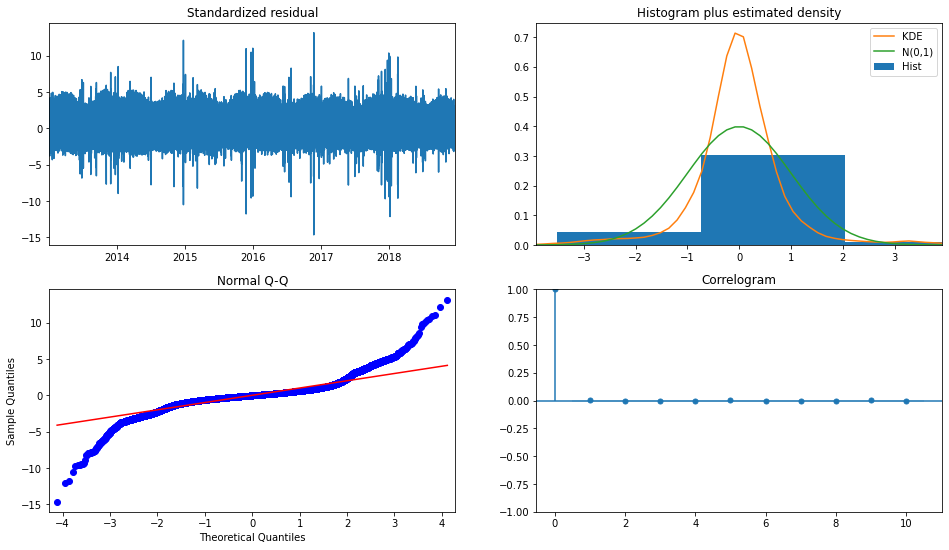

In [ ]:
# For System load forecast
y = df[' System load forecast']
lag = 'aic'
max_lag = 48
res_s= fit_ar_mod(y, lag, max_lag)
res_s.plot_diagnostics(figsize=[16,9])
res_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                AutoReg Model Results                                
=====================================================================================
Dep. Variable:      Zonal COMED load foecast   No. Observations:                52416
Model:                           AutoReg(48)   Log Likelihood             -329442.464
Method:                      Conditional MLE   S.D. of innovations            130.578
Date:                       Fri, 22 Mar 2024   AIC                              9.746
Time:                               16:18:34   BIC                              9.754
Sample:                           01-03-2013   HQIC                             9.749
                                - 12-24-2018                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        72.0820      4.419     16.313      0.000      63.422      80.742
 Zonal COMED load foecast.L1      1.6684      0.004    382.023      0.000       1.660       1.677
 Zonal COMED load foecast.L2     -0.7395      0.008    -87.063      0.000      -0.756      -0.723
 Zonal COMED load foecast.L3      0.0526      0.009      5.790      0.000       0.035       0.070
 Zonal COMED load foecast.L4      0.0358      0.009      3.938      0.000       0.018       0.054
 Zonal COMED load foecast.L5     -0.0327      0.009     -3.602      0.000      -0.051      -0.015
 Zonal COMED load foecast.L6      0.0038      0.009      0.417      0.677      -0.014       0.022
 Zonal COMED load foecast.L7     -0.0114      0.009     -1.250      0.211      -0.029       0.006
 Zonal COMED load foecast.L8     -0.0415      0.009     -4.563      0.000      -0.059      -0.024
 Zonal COMED load foecast.L9      0.0324      0.009      3.562      0.000       0.015       0.050
 Zonal COMED load foecast.L10     0.0234      0.009      2.580      0.010       0.006       0.041
 Zonal COMED load foecast.L11     0.0246      0.009      2.710      0.007       0.007       0.042
 Zonal COMED load foecast.L12    -0.1117      0.009    -12.304      0.000      -0.130      -0.094
 Zonal COMED load foecast.L13     0.1550      0.009     17.059      0.000       0.137       0.173
 Zonal COMED load foecast.L14    -0.1028      0.009    -11.279      0.000      -0.121      -0.085
 Zonal COMED load foecast.L15    -0.0098      0.009     -1.069      0.285      -0.028       0.008
 Zonal COMED load foecast.L16    -0.0040      0.009     -0.441      0.659      -0.022       0.014
 Zonal COMED load foecast.L17     0.0629      0.009      6.892      0.000       0.045       0.081
 Zonal COMED load foecast.L18    -0.0057      0.009     -0.622      0.534      -0.024       0.012
 Zonal COMED load foecast.L19     0.0039      0.009      0.431      0.666      -0.014       0.022
 Zonal COMED load foecast.L20    -0.0173      0.009     -1.901      0.057      -0.035       0.001
 Zonal COMED load foecast.L21    -0.0257      0.009     -2.819      0.005      -0.044      -0.008
 Zonal COMED load foecast.L22    -0.0148      0.009     -1.627      0.104      -0.033       0.003
 Zonal COMED load foecast.L23     0.1787      0.009     19.719      0.000       0.161       0.197
 Zonal COMED load foecast.L24     0.3895      0.008     46.477      0.000       0.373       0.406
 Zonal COMED load foecast.L25    -0.8106      0.008    -96.721      0.000      -0.827      -0.794
 Zonal COMED load foecast.L26     0.1780      0.009     19.636      0.000       0.160       0.196
 Zonal COMED load foecast.L27     0.1553      0.009     17.070      0.000       0.137       0.173
 Zonal COMED load foecast.L28    -0.0431      0.009     -4.723      0.000      -0.061      -0.025
 Zonal COMED load foecast.L29    -0.0284  

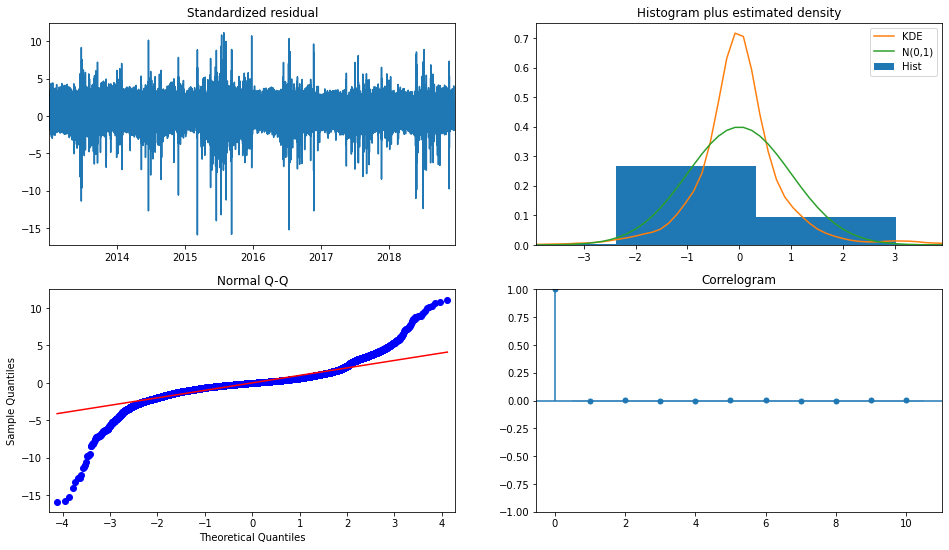

In [ ]:
# For Zonal COMED load forecast
y = df[' Zonal COMED load foecast']
lag = 'aic'
max_lag = 48
res_z= fit_ar_mod(y, lag, max_lag)
res_z.plot_diagnostics(figsize=[16,9])
res_z.summary()

# c.

In [ ]:
def get_forecasts(res, hmax):
    forecasts = res.forecast(steps=hmax)
    return np.array(forecasts)

In [ ]:
# For Zonal COMED price
res = AutoReg(df[' Zonal COMED price'], lags=16).fit()
hmax = 24
forecast_p = get_forecasts(res, hmax)
forecast_p

array([23.67877187, 23.66970249, 24.2425586 , 25.35224288, 26.94047154,
       27.99119215, 29.18370251, 28.8301672 , 28.10722997, 27.49734325,
       27.21824324, 27.11096067, 27.19676751, 27.49579039, 27.79367389,
       28.25800606, 28.75298314, 29.23752878, 29.24476251, 29.10515699,
       28.74919161, 28.41705359, 28.34299069, 28.44804861])

In [ ]:
# For System load forecast
res = AutoReg(df[' System load forecast'], lags=3).fit()
hmax = 24
forecast_z = get_forecasts(res, hmax)
forecast_z

array([85295.82107256, 83309.20092254, 82237.14661749, 82003.65842778,
       82419.4228553 , 83263.85954633, 84333.80063122, 85467.28280166,
       86550.4723077 , 87514.4179272 , 88326.69683066, 88981.43604249,
       89489.84810196, 89872.38763961, 90152.91537556, 90354.80549581,
       90498.69197877, 90601.45797532, 90676.07577188, 90731.96043022,
       90775.57714347, 90811.12071901, 90841.15412293, 90867.14676845])

In [ ]:
# For Zonel load forecast
res = AutoReg(df[' Zonal COMED load foecast'], lags=5).fit()
hmax = 24
forecast_s = get_forecasts(res, hmax)
forecast_s

array([10067.35866019,  9847.11610262,  9733.32646325,  9711.18754614,
        9770.69439278,  9891.56782511, 10052.21385068, 10234.88872098,
       10425.05135458, 10611.13990523, 10784.78219989, 10940.50148489,
       11075.20621461, 11187.72159015, 11278.34803478, 11348.44436996,
       11400.06514819, 11435.66182522, 11457.84461042, 11469.2010632 ,
       11472.16613407, 11468.93640315, 11461.42074137, 11451.21991117])

# d.

In [ ]:
def rolling_ar_forecast(s, T0, p, h):
    forecasts = []
    for i in range(len(s) - T0):
        mod = AutoReg(s[i:T0 + i], lags=p).fit()
        forecast = mod.forecast(steps=h)
        forecasts.append(forecast)

    return np.array(forecasts)

In [ ]:
# For Zonal COMED price
s = df[' Zonal COMED price']
T0 = 52380
p = 16
h = 10
rolling_forecast_p = rolling_ar_forecast(s, T0, p, h)
rolling_forecast_p

array([[24.74944578, 24.99587822, 25.37004659, 25.54679178, 25.79685821,
        26.25907221, 26.8986477 , 27.92488398, 28.44917523, 28.4402659 ],
       [24.13165643, 24.51439446, 24.78469847, 25.1182036 , 25.7010426 ,
        26.45581243, 27.55420273, 28.18917184, 28.27565361, 27.66717885],
       [23.90329488, 24.17957633, 24.57915386, 25.22091543, 26.0609105 ,
        27.24069736, 27.92664681, 28.09135661, 27.55031253, 26.75363967],
       [23.28990273, 23.69828558, 24.43634307, 25.36221642, 26.66616556,
        27.47068867, 27.70966868, 27.28255363, 26.58407495, 26.3052116 ],
       [23.51097263, 24.25098185, 25.19723171, 26.51935595, 27.35010623,
        27.61412292, 27.20269323, 26.52823883, 26.27007114, 26.41357469],
       [26.02873291, 26.95729829, 28.08690862, 28.74596563, 28.76179675,
        28.11335905, 27.29044552, 26.8045852 , 26.7518562 , 26.91472698],
       [35.17783068, 36.2256607 , 35.99451106, 35.21642478, 33.42035281,
        31.50145672, 30.32905064, 29.22343662

In [ ]:
rolling_forecast_p.shape

(36, 10)

In [ ]:
# For System load forecast
s = df[' System load forecast']
T0 = 52380
p = 3
h = 10
rolling_forecast_s = rolling_ar_forecast(s, T0, p, h)
rolling_forecast_s

array([[ 87148.51459422,  86654.18399092,  86504.6110119 ,
         86652.25353109,  87014.93490122,  87505.16242617,
         88046.61900699,  88581.40062928,  89071.21244519,
         89495.10792813],
       [ 86695.54265129,  86565.42817854,  86725.74578581,
         87093.7748494 ,  87583.04621314,  88118.93805195,
         88645.33629345,  89125.5063248 ,  89539.69020237,
         89881.25662269],
       [ 85980.35458421,  85865.57360256,  86054.57846884,
         86468.55518518,  87018.35533913,  87623.84167483,
         88222.92950343,  88773.77394448,  89252.92609074,
         89651.55643908],
       [ 85983.32759343,  86227.67425306,  86677.63894059,
         87242.53798033,  87845.16432541,  88428.27420739,
         88955.129268  ,  89406.72867952,  89777.62894177,
         90071.5865339 ],
       [ 88253.62601471,  89656.10250998,  90840.78258544,
         91703.97108571,  92238.74723198,  92491.57612875,
         92531.24924035,  92428.81008074,  92246.2510352 ,
         92

In [ ]:
# For Zonel load forecast
s = df[' Zonal COMED load foecast']
T0 = 52380
p = 5
h = 10
rolling_forecast_z = rolling_ar_forecast(s, T0, p, h)
rolling_forecast_z

array([[10390.09495469, 10500.48841681, 10615.39845887, 10729.60997639,
        10841.86539377, 10948.67410444, 11046.49810571, 11133.24925678,
        11207.85090753, 11269.94890817],
       [10357.20437372, 10418.03704634, 10496.62383007, 10589.44210475,
        10692.82492189, 10800.33199122, 10906.06944919, 11005.74057626,
        11096.25708205, 11175.63151535],
       [10272.38235969, 10295.99429757, 10352.59392883, 10436.2119488 ,
        10540.22911842, 10655.8018563 , 10774.76532613, 10890.75834395,
        10999.01443429, 11096.25151923],
       [10246.05811756, 10283.80688014, 10355.00224969, 10452.23606436,
        10566.60390585, 10688.93032871, 10811.52863223, 10928.51075638,
        11035.64222497, 11130.22437089],
       [10296.50041947, 10372.49483702, 10472.89795456, 10589.00466344,
        10711.65387005, 10833.41455017, 10948.73448223, 11053.66345013,
        11145.74429466, 11223.81862373],
       [10653.31579458, 10859.69757825, 11045.6099511 , 11206.33464648,
   

# e.


In [ ]:
# Refer Lab 2C
def DM_statistic(d, h):
    tau = d.shape[0]
    d_bar = d.mean()
    sigma_d = np.sum(d*d)
    if h > 1:
        for j in range(h-1):
            sigma_d += 2 * np.sum(d[1+j:]*d[:tau-j-1])
    sigma_d = np.sqrt((sigma_d/tau))
    DM = d_bar/sigma_d 
    return DM

In [ ]:
s = df[' Zonal COMED price'][:400]
T0 = 300
dm_stats = []
for h in range(1, 25):
    y_hat_3 = rolling_ar_forecast(s, T0, 3, h)
    y_hat_6 = rolling_ar_forecast(s, T0, 6, h)
    
    y = []
    for i in range(len(s) - T0 - h):
        y.append(s[T0 + i:(T0 + h + i)])
    y = np.array(y)
    
    MSFE_ar3 = (y_hat_3[:-h, :] - y)**2
    MSFE_ar6 = (y_hat_6[:-h, :] - y)**2
    
    d = MSFE_ar3 - MSFE_ar6
    dm_stat = DM_statistic(d, h)
    dm_stats.append(dm_stat)
dm_stats

[0.1850399603149963,
 0.09798012873135717,
 0.04873853866681943,
 0.022865670137094948,
 0.007671779418050209,
 -0.0019916038635062207,
 -0.008022380416649823,
 -0.010546892451447657,
 -0.012080274545006982,
 -0.01302684196581825,
 -0.01366756768518356,
 -0.013071622683981444,
 -0.012056079935665504,
 -0.0109540375909826,
 -0.01090717928223757,
 -0.01286363838160896,
 -0.016428053774044687,
 -0.022266592927657217,
 -0.027742375708815877,
 -0.029432093158253344,
 -0.028435794361592617,
 -0.026113653539075445,
 -0.022891700314181623,
 -0.019045976669314308]

# f.

In [ ]:
def MDM_statistic(d, h):
    tau = d.shape[0]
    d_bar = d.mean()
    sigma_d = np.sum(d*d)
    if h > 1:
        for j in range(h-1):
            sigma_d += 2 * np.sum(d[1+j:]*d[:tau-j-1])
    sigma_d = np.sqrt((sigma_d/tau))
    DM = d_bar/sigma_d 
    MDM = DM * (((tau + 1 - 2 * h + (h * (h-1) / tau)) / tau) ** 0.5)
    return MDM

In [ ]:
mdm_stats = []
for h in range(1, 25):
    y_hat_3 = rolling_ar_forecast(s, T0, 3, h)
    y_hat_6 = rolling_ar_forecast(s, T0, 6, h)
    
    y = []
    for i in range(len(s) - T0 - h):
        y.append(s[T0 + i:(T0 + h + i)])
    y = np.array(y)
    
    MSFE_ar3 = (y_hat_3[:-h, :] - y)**2
    MSFE_ar6 = (y_hat_6[:-h, :] - y)**2
    
    d = MSFE_ar3 - MSFE_ar6
    mdm_stat = MDM_statistic(d, h)
    mdm_stats.append(mdm_stat)
mdm_stats

[0.18410304310333106,
 0.09647913780060145,
 0.047481726129863316,
 0.022031704040638863,
 0.007308267798655472,
 -0.0018750439244472948,
 -0.007461551751699851,
 -0.009686921848900519,
 -0.010951696113722164,
 -0.01165156166708664,
 -0.01205485729689167,
 -0.011363156548134952,
 -0.010323652030543093,
 -0.00923428882383669,
 -0.009046315296284704,
 -0.010489711369462753,
 -0.013161863804062719,
 -0.017514049888703812,
 -0.021405469088417162,
 -0.022257260311576346,
 -0.02105611656707735,
 -0.018914918593036054,
 -0.016201885222315086,
 -0.013156163507199564]

In [ ]:
from scipy import stats
df_f = pd.DataFrame(mdm_stats)
df_f[1] = 2*stats.norm.cdf(-np.abs(df_f[0]))
df_f = df_f.rename(columns = {0: 'MDM', 1: 'p-value'})
df_f = df_f.T
df_f.columns = range(1, 25)
df_f

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
MDM,0.184103,0.096479,0.047482,0.022032,0.007308,-0.001875,-0.007462,-0.009687,-0.010952,-0.011652,...,-0.009046,-0.010490,-0.013162,-0.017514,-0.021405,-0.022257,-0.021056,-0.018915,-0.016202,-0.013156
p-value,0.853933,0.923140,0.962129,0.982423,0.994169,0.998504,0.994047,0.992271,0.991262,0.990704,...,0.992782,0.991631,0.989499,0.986027,0.982922,0.982243,0.983201,0.984909,0.987073,0.989503


In [ ]:
df_f.T

,MDM,p-value
1,0.184103,0.853933
2,0.096479,0.923140
3,0.047482,0.962129
4,0.022032,0.982423
5,0.007308,0.994169
6,-0.001875,0.998504
7,-0.007462,0.994047
8,-0.009687,0.992271
9,-0.010952,0.991262
10,-0.011652,0.990704


## Problem 3

# a 
The function estimates the optimal length for a VAR for the variables in df using the AIC, BIC, HQIC respectively and a maximum lag length of maxlags. Report and interpret the results.

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

def calculate_ic(df, maxlags):
    # Convert all columns to float
    df = df.astype(float)
    
    ic_values = []

    for lag in maxlags:
        model = VAR(df)
        results = model.fit(lag)
        ic_values.append([lag, results.aic, results.bic, results.hqic])

    ic_df = pd.DataFrame(ic_values, columns=['Lag', 'AIC', 'BIC', 'HQIC'])
    return ic_df

# Load data
df = pd.read_csv('PJM.csv', parse_dates=['Date'], index_col='Date')
df.columns = ['Zonal_COMED_price', 'System_load_forecast', 'Zonal_COMED_load_forecast']
df = df.astype(float)

maxlags = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ic_df = calculate_ic(df, maxlags)
print(ic_df)

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\python\lib\site-packages\statsmodels\tsa\base\t

    Lag        AIC        BIC       HQIC
0     1  30.757071  30.759101  30.757706
1     2  28.132076  28.135629  28.133187
2     3  27.801695  27.806770  27.803281
3     4  27.779157  27.785754  27.781219
4     5  27.744723  27.752844  27.747261
5     6  27.704536  27.714180  27.707550
6     7  27.680788  27.691954  27.684278
7     8  27.656220  27.668909  27.660186
8     9  27.607674  27.621886  27.612116
9    10  27.569541  27.585276  27.574459
10   11  27.525311  27.542569  27.530705
11   12  27.485807  27.504588  27.491677
12   13  27.462122  27.482427  27.468469
13   14  27.265252  27.287080  27.272075
14   15  27.155159  27.178509  27.162457
15   16  27.108660  27.133535  27.116435
16   17  27.072016  27.098413  27.080267
17   18  27.060058  27.087979  27.068785
18   19  27.053989  27.083434  27.063193
19   20  27.049269  27.080236  27.058948


# b 
and returns: • a N × N dataframe of Ftest statistics testing the H0 of no Granger-Causality for each pair of variables. Report and interpret the results.

In [3]:
from statsmodels.tsa.vector_ar.var_model import VARResults
import pandas as pd
def granger_causality_tests(res: VARResults, lag: int) -> pd.DataFrame:
    variables = res.model.endog_names
    f_stats = pd.DataFrame(index=variables, columns=variables)

    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            test_result = res.test_causality(var1, var2, kind='f', signif=0.05)
            f_stats.loc[var1, var2] = test_result.test_statistic

    return f_stats
model = VAR(df)
lag = ic_df['AIC'].idxmin()
results = model.fit(lag)

f_stats = granger_causality_tests(results, lag)
print(f_stats)

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                          Zonal_COMED_price System_load_forecast  \
Zonal_COMED_price              16710.417925           151.268283   
System_load_forecast              19.168456        100634.209447   
Zonal_COMED_load_forecast         12.695566          2555.598165   

                          Zonal_COMED_load_forecast  
Zonal_COMED_price                         29.201306  
System_load_forecast                     324.049866  
Zonal_COMED_load_forecast             148601.682234  


# c
Which variables appear to have a short-lived response to the shock？

d:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


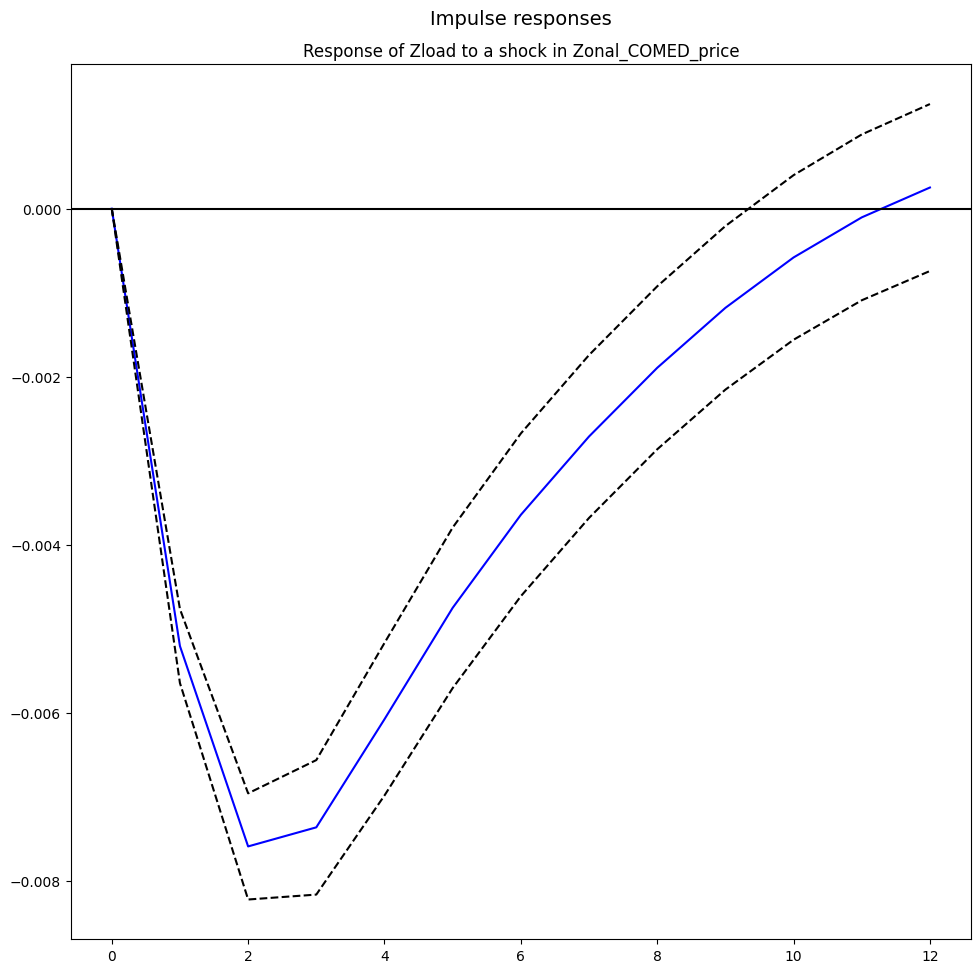

<Figure size 1000x500 with 0 Axes>

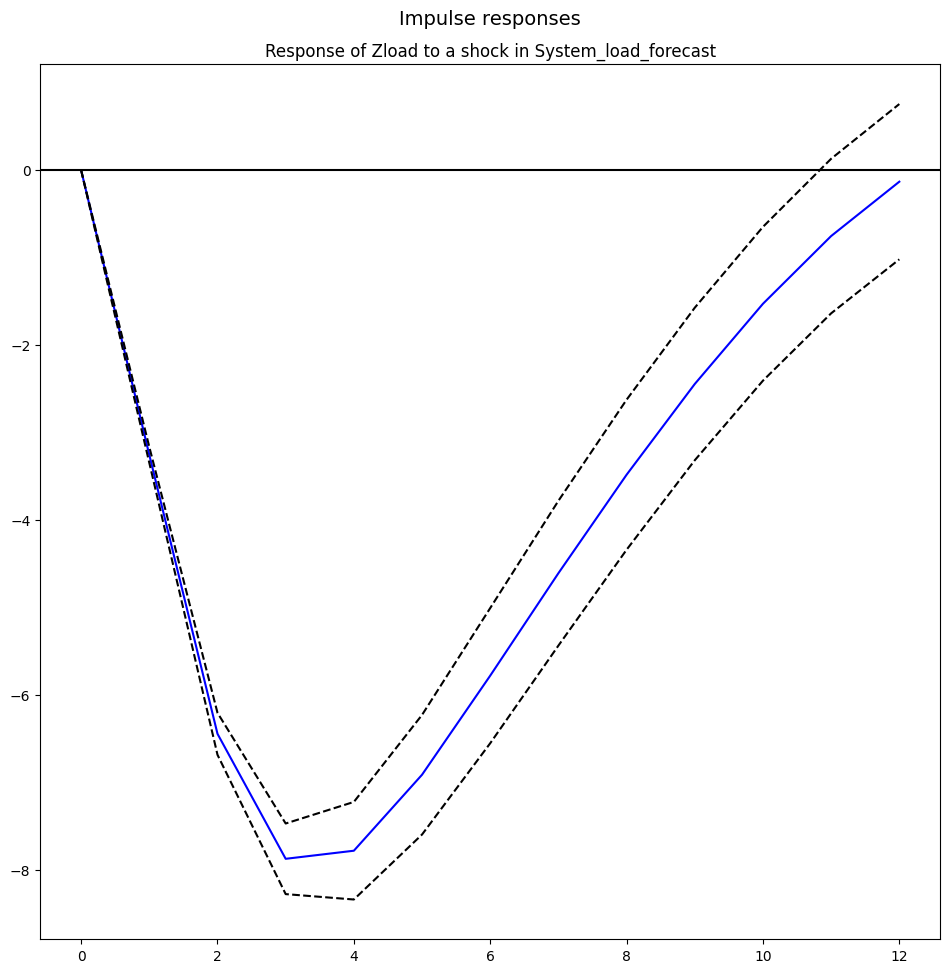

<Figure size 1000x500 with 0 Axes>

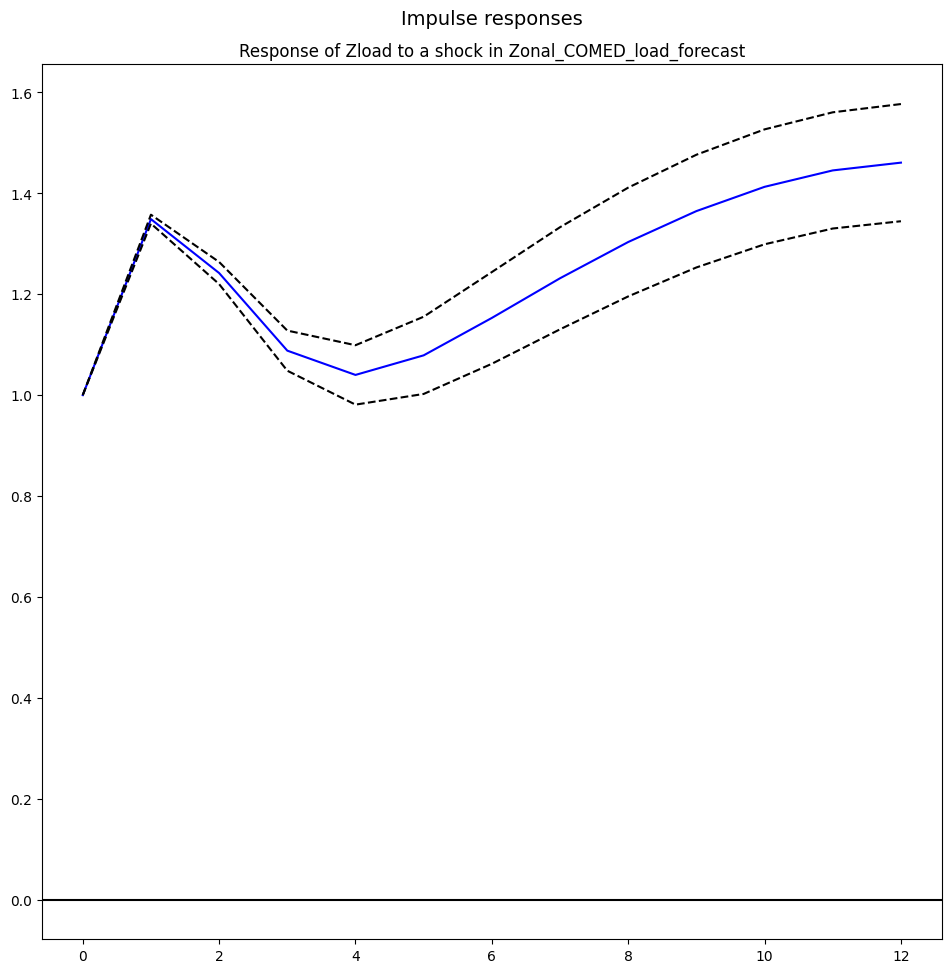

<Figure size 1000x500 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit a VAR(3) model
model = VAR(df)
results = model.fit(3)

# Compute impulse responses
irf = results.irf(12)

# Plot response of Zload to a shock in each variable
for var in ['Zonal_COMED_price', 'System_load_forecast', 'Zonal_COMED_load_forecast']:
    irf.plot(impulse='Zonal_COMED_load_forecast', response=var)
    plt.title(f'Response of Zload to a shock in {var}')
    plt.figure(figsize=(10, 5))
    plt.show()